In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./accelerometer.csv')

In [143]:
df.shape

(153000, 5)

In [144]:
# Remove later

# df = df.iloc[:1000,:]

In [145]:
df.shape

(153000, 5)

In [146]:
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [147]:
# Unique values in wconfid, pctid
print("Unique values in wconfid", df['wconfid'].unique())
print("Unique values in pctid", df['pctid'].unique())

Unique values in wconfid [1 2 3]
Unique values in pctid [ 20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100]


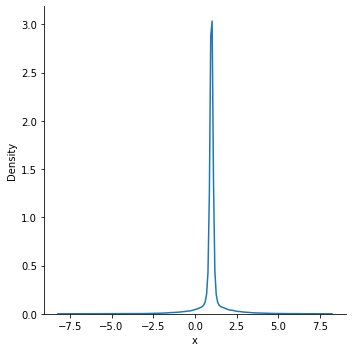

In [148]:
sns.displot(x = df['x'], kind='kde')

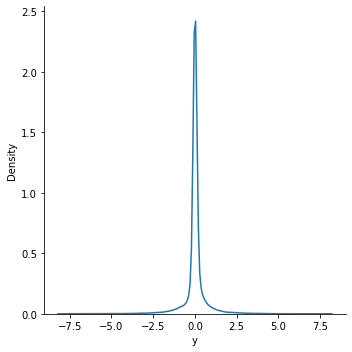

In [149]:
sns.displot(x = df['y'], kind='kde')

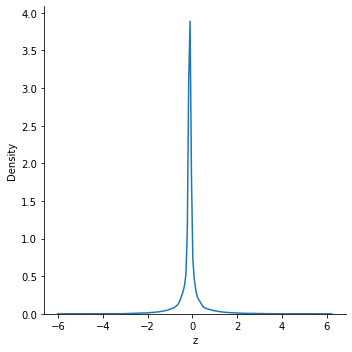

In [150]:
sns.displot(x = df['z'], kind='kde')

In [151]:
# Separating target variable
y = df['wconfid']
df.drop(columns=['wconfid'], inplace=True)

In [152]:
# df = df.to_numpy()
# y = y.to_numpy()

# Implementing ANN with 5 fold

In [153]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_predict

skf = StratifiedKFold(n_splits=5)

conf_matrixes = list()

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)

for train_index, test_index in skf.split(df, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    clf = MLPClassifier().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cmf = multilabel_confusion_matrix(y_test, y_pred)
    conf_matrixes.append(cmf)
    actual_classes = np.append(actual_classes, y_test)
    predicted_classes = np.append(predicted_classes, y_pred)

TRAIN: [ 10200  10201  10202 ... 152997 152998 152999] TEST: [     0      1      2 ... 112197 112198 112199]


ValueError: operands could not be broadcast together with shapes (0,) (30600,) 

In [ ]:
print(actual_classes)